# <center> Introduccion a la Ciencia de Datos.</center>
## <center> Tarea 2 </center>


In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import pylab as plt

from sklearn.metrics import f1_score

from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.estimators import HillClimbSearch, BicScore, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

In [2]:
''' Cargue los datos del archivo Riesgo_Credito.csv, se recomienda utilizar pandas.read_csv '''
data = pd.read_csv("Riesgo_Credito.csv" ,index_col=0)
data.head()

,Evaluacion crediticia historica,Edad,Genero,Evaluacion Sueldo,Residencia,Nivel de ahorro,Monto del credito,Duracion,Proposito,Riesgo
0,4,38 to 75,male,2,own,no account,250 to 1554,4 to 12,radio/TV,good
1,2,19 to 28,female,2,own,little,250 to 1554,12 to 24,radio/TV,bad
2,4,28 to 38,male,1,own,little,250 to 1554,4 to 12,education,good
3,2,28 to 38,male,2,free,little,1554 to 3368,12 to 24,furniture/equipment,good
4,3,28 to 38,male,2,free,little,250 to 1554,4 to 12,car,bad


### Pregunta 1.1.1 - Hill Climbing (10 ptos)

En esta sección explique el método Hill Climbing para el aprendizaje de estructuras de redes.
### Es un algoritmo iterativo de búsqueda local que comienza con una solución arbitraria, para luego variar incrementalmente un elemento de la solución hasta encontrar una solución mejor y así cambiar el incremento a un elemento de la nueva solución. El algoritmo itera hasta no encontrar mejoras, osea hasta encontrar un óptimo local.

### Pregunta 1.1.2 - Creacion de una Red Bayesiana (5 ptos)
Uilice este método (utilice BICScore) para aprender una estructura para la red y grafíquela.

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

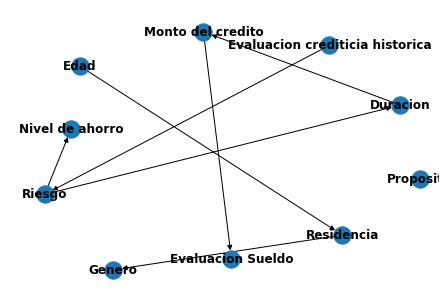

In [3]:
''' Su código aquí '''
est = HillClimbSearch(data)
best_model = est.estimate(scoring_method=BicScore(data))
est.estimate(max_indegree=1).edges()
nx.draw(best_model, with_labels=True, font_weight='bold')

### Pregunta 1.1.3 - Proponga una mejora (5 ptos)
Comente sobre la estructura obtenida y proponga una mejora, cree la red utilizando pgmpy y luego grafiquela.

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

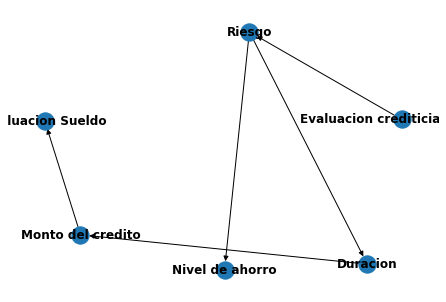

In [4]:
''' Su código aquí '''
data = data.drop(['Proposito','Edad','Genero','Residencia'], axis=1)
est = HillClimbSearch(data)
best_model = est.estimate(scoring_method=BicScore(data))
est.estimate(max_indegree=1).edges()
nx.draw(best_model, with_labels=True, font_weight='bold')

### Debido a que existen nodos que no están conectados al label que quiero predecir "Riesgo", decidí eliminar todos esos nodos no conectados. Estos son: Proposito, Edad, Genero y Residencia.

### 1.1.4. Estimación por máxima verosimilitud (10 ptos)
Aprenda los parámetros de cada CPD de la red utilizando el método de máxima verosimilitud (utilizando el método MaximumLikelihoodEstimator).

In [9]:
''' Su código Aquí '''
model = BayesianNetwork(best_model.edges())
mle = MaximumLikelihoodEstimator(model, data)
columnas = list(data.columns)
for parametro in columnas:
    model.add_cpds(mle.estimate_cpd(parametro))
    print(mle.estimate_cpd(parametro))
    print("\n")
#model.check_model()

+------------------------------------+-------+
| Evaluacion crediticia historica(0) | 0.04  |
+------------------------------------+-------+
| Evaluacion crediticia historica(1) | 0.049 |
+------------------------------------+-------+
| Evaluacion crediticia historica(2) | 0.53  |
+------------------------------------+-------+
| Evaluacion crediticia historica(3) | 0.088 |
+------------------------------------+-------+
| Evaluacion crediticia historica(4) | 0.293 |
+------------------------------------+-------+


+----------------------+-----+----------------------------------+
| Monto del credito    | ... | Monto del credito(3368 to 18424) |
+----------------------+-----+----------------------------------+
| Evaluacion Sueldo(0) | ... | 0.05263157894736842              |
+----------------------+-----+----------------------------------+
| Evaluacion Sueldo(1) | ... | 0.0                              |
+----------------------+-----+----------------------------------+
| Evaluacion Sueldo

True

### 1.2 Independencias Locales (5 ptos)

Liste todas las independencias locales y todas las independencias markovianas globales para la variable Riesgo.

In [18]:
''' Su código aquí'''
model.local_independencies('Riesgo')

### Debido a que eliminé todas las variables no conectadas a "Riesgo", también se eliminaron las independencias locales, es por ello que sale vacío.

### 1.3 Consultas (15 ptos)

1. Dado una edad de 21 años, ¿Cual es la probabilidad de riesgo alto? <br>


In [21]:
''' Su código aquí '''
infer = VariableElimination(model)
g_dist = infer.query(['Riesgo'])
print(g_dist)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+--------------+---------------+
| Riesgo       |   phi(Riesgo) |
+==============+===============+
| Riesgo(bad)  |        0.3000 |
+--------------+---------------+
| Riesgo(good) |        0.7000 |
+--------------+---------------+


### Debido a que el riesgo no depende de la edad (y que ya no existe esa columna), se calcula una distribución no condicional.
### Teniendo como resultado un 30% para Riesgo alto, independiente de la edad.

2. Liste la probabilidad condicional de riesgo dado evaluacion crediticia historica. <br>


In [26]:
data['Evaluacion crediticia historica'].unique()

array([4, 2, 3, 0, 1], dtype=int64)

### Debido a que no me piden una "Evalucion Creditica Historica" en específico, calculé el valor para cada uno de los posibles valores.

In [24]:
''' Su código aquí '''
print(infer.query(['Riesgo'], evidence={'Evaluacion crediticia historica': 0}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------------+---------------+
| Riesgo       |   phi(Riesgo) |
+==============+===============+
| Riesgo(bad)  |        0.6250 |
+--------------+---------------+
| Riesgo(good) |        0.3750 |
+--------------+---------------+


In [27]:
print(infer.query(['Riesgo'], evidence={'Evaluacion crediticia historica': 1}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------------+---------------+
| Riesgo       |   phi(Riesgo) |
+==============+===============+
| Riesgo(bad)  |        0.5714 |
+--------------+---------------+
| Riesgo(good) |        0.4286 |
+--------------+---------------+


In [28]:
print(infer.query(['Riesgo'], evidence={'Evaluacion crediticia historica': 2}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------------+---------------+
| Riesgo       |   phi(Riesgo) |
+==============+===============+
| Riesgo(bad)  |        0.3189 |
+--------------+---------------+
| Riesgo(good) |        0.6811 |
+--------------+---------------+


In [29]:
print(infer.query(['Riesgo'], evidence={'Evaluacion crediticia historica': 3}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------------+---------------+
| Riesgo       |   phi(Riesgo) |
+==============+===============+
| Riesgo(bad)  |        0.3182 |
+--------------+---------------+
| Riesgo(good) |        0.6818 |
+--------------+---------------+


In [30]:
print(infer.query(['Riesgo'], evidence={'Evaluacion crediticia historica': 4}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------------+---------------+
| Riesgo       |   phi(Riesgo) |
+==============+===============+
| Riesgo(bad)  |        0.1706 |
+--------------+---------------+
| Riesgo(good) |        0.8294 |
+--------------+---------------+


3. Dado que el credito es de duración de 3 años (36 meses), ¿cuál es la probabilidad de riesgo alto? <br>

In [31]:
data['Duracion'].unique()

array(['4 to 12', '12 to 24', '24 to 72'], dtype=object)

In [32]:
''' Su código aquí '''
print(infer.query(['Riesgo'], evidence={'Duracion': '24 to 72'}))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+--------------+---------------+
| Riesgo       |   phi(Riesgo) |
+==============+===============+
| Riesgo(bad)  |        0.5000 |
+--------------+---------------+
| Riesgo(good) |        0.5000 |
+--------------+---------------+


### La probabilidad de Riesgo alto es del 50%.

## Referencias

- Código de la ayudantía 3.